In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as imageTF
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


ImportError: cannot import name 'IncecptionV3' from 'tensorflow.keras.applications' (X:\Program\anaconda3\envs\TensorflowSession\lib\site-packages\keras\api\_v2\keras\applications\__init__.py)

In [21]:
img = imageTF.load_img("data/nov2021_train/000000.jpg")

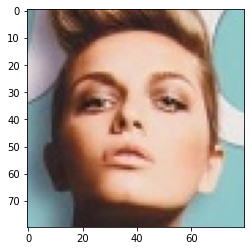

In [22]:
plt.imshow(img)

In [24]:
#cv2.imread("data/nov2021_train/000000.jpg")

In [25]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [26]:
train_dataset = train.flow_from_directory("data/train/",
                                          target_size = (80,80),
                                          batch_size = 50, 
                                          class_mode = "binary")

val_dataset = train.flow_from_directory("data/val/", 
                                        batch_size = 50,
                                        target_size = (80,80),
                                        class_mode = "binary")

Found 60594 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [27]:
train_dataset.class_indices

{'0': 0, '1': 1}

In [35]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (80,80,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid'),
                                   ])

In [46]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (80,80,3)))
model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(2048, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(1024, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))


In [36]:
model.compile(loss= 'binary_crossentropy',
            optimizer = RMSprop(learning_rate=0.001),
            metrics = ['accuracy'])

In [47]:
model2.compile(loss= 'binary_crossentropy',
            optimizer = RMSprop(learning_rate=0.001),
            metrics = ['accuracy'])

In [49]:
#model_fit = model.fit(train_dataset,
#                     steps_per_epoch = 10,
#                     epochs = 500,
#                     validation_data = val_dataset) 

model_fit = model2.fit(train_dataset,
                     steps_per_epoch = 2,
                     epochs = 100,
                     validation_data = val_dataset) 

Epoch 1/100
2/2 [==============================] - 4s 2s/step - loss: 0.6195 - accuracy: 0.7100 - val_loss: 0.6658 - val_accuracy: 0.5825
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 0.6692 - accuracy: 0.6200 - val_loss: 0.6867 - val_accuracy: 0.5775
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 0.6169 - accuracy: 0.6900 - val_loss: 0.7559 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 4s 2s/step - loss: 0.6017 - accuracy: 0.6700 - val_loss: 0.6923 - val_accuracy: 0.5625
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 0.6611 - accuracy: 0.6600 - val_loss: 0.6509 - val_accuracy: 0.6175
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 0.7355 - accuracy: 0.5700 - val_loss: 0.6826 - val_accuracy: 0.6175
Epoch 7/100
2/2 [==============================] - 4s 2s/step - loss: 0.6094 - accuracy: 0.6800 - val_loss: 0.8993 - val_accuracy: 0.5150
Epoch 8/100
2/2 [=================

2/2 [==============================] - 5s 3s/step - loss: 0.5076 - accuracy: 0.7800 - val_loss: 0.6709 - val_accuracy: 0.6000
Epoch 61/100
2/2 [==============================] - 4s 2s/step - loss: 0.5338 - accuracy: 0.7700 - val_loss: 0.7775 - val_accuracy: 0.4925
Epoch 62/100
2/2 [==============================] - 5s 3s/step - loss: 0.4218 - accuracy: 0.8100 - val_loss: 0.7142 - val_accuracy: 0.5675
Epoch 63/100
2/2 [==============================] - 5s 3s/step - loss: 0.6501 - accuracy: 0.7200 - val_loss: 0.6485 - val_accuracy: 0.6500
Epoch 64/100
2/2 [==============================] - 5s 3s/step - loss: 0.5351 - accuracy: 0.7500 - val_loss: 0.6417 - val_accuracy: 0.6200
Epoch 65/100
2/2 [==============================] - 4s 2s/step - loss: 0.5489 - accuracy: 0.7300 - val_loss: 0.6505 - val_accuracy: 0.6375
Epoch 66/100
2/2 [==============================] - 4s 2s/step - loss: 0.5971 - accuracy: 0.7000 - val_loss: 0.7068 - val_accuracy: 0.5575
Epoch 67/100
2/2 [======================

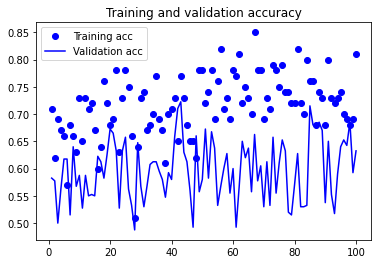

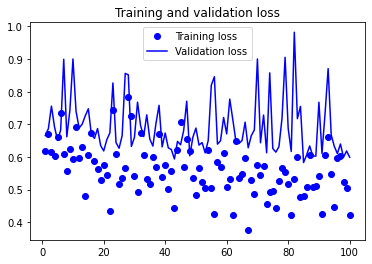

In [50]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

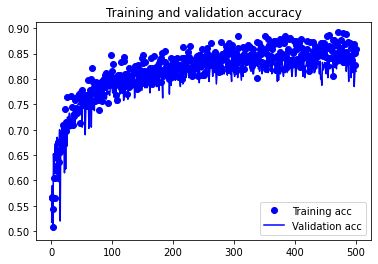

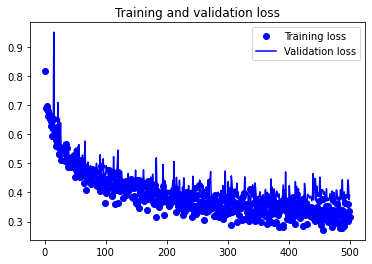

In [38]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 78, 78, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 39, 39, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)        

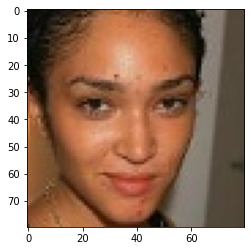

0_000002.jpg
calsse 0
Nouvelle Image





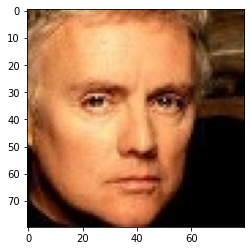

0_000003.jpg
calsse 0
Nouvelle Image





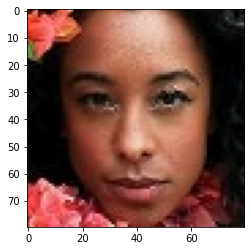

0_000004.jpg
calsse 0
Nouvelle Image





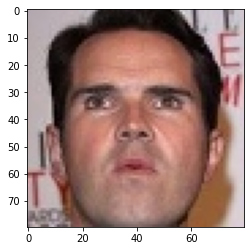

0_000008.jpg
calsse 0
Nouvelle Image





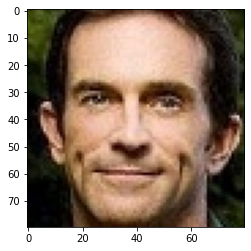

0_000010.jpg
calsse 0
Nouvelle Image





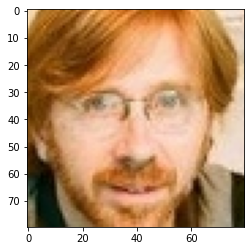

0_000014.jpg
calsse 0
Nouvelle Image





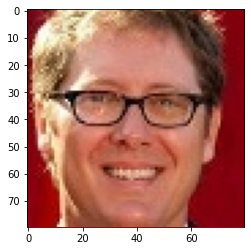

0_000016.jpg
calsse 0
Nouvelle Image





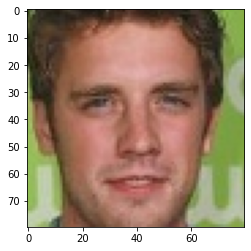

0_000022.jpg
classe 1
Nouvelle Image





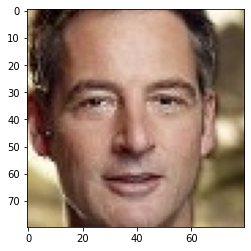

0_000024.jpg
calsse 0
Nouvelle Image





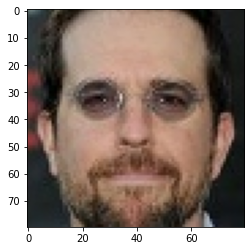

0_000026.jpg
calsse 0
Nouvelle Image





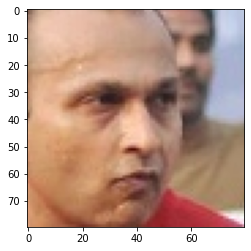

0_000027.jpg
calsse 0
Nouvelle Image





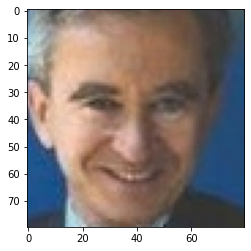

0_000034.jpg
calsse 0
Nouvelle Image





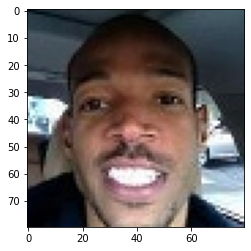

0_000050.jpg
calsse 0
Nouvelle Image





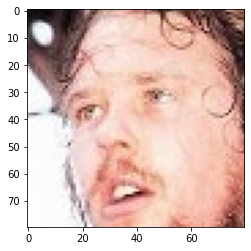

0_000051.jpg
classe 1
Nouvelle Image





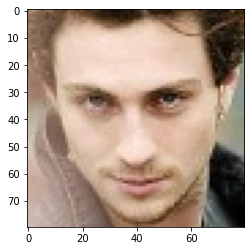

0_000052.jpg
classe 1
Nouvelle Image





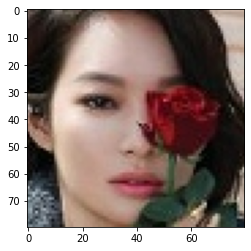

0_000055.jpg
classe 1
Nouvelle Image





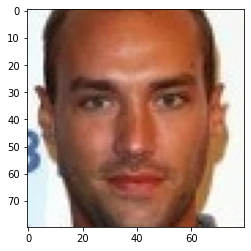

0_000062.jpg
calsse 0
Nouvelle Image





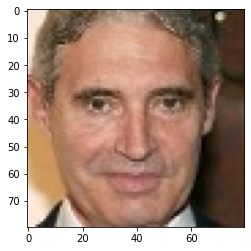

0_000066.jpg
calsse 0
Nouvelle Image





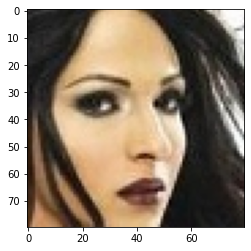

0_000069.jpg
calsse 0
Nouvelle Image





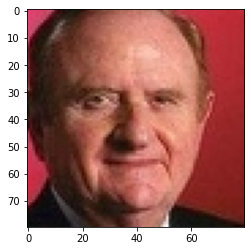

0_000075.jpg
calsse 0
Nouvelle Image





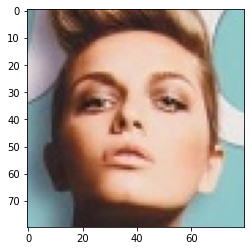

1_000000.jpg
classe 1
Nouvelle Image





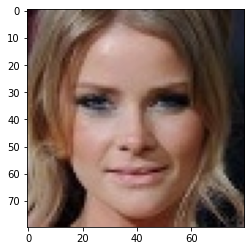

1_000001.jpg
classe 1
Nouvelle Image





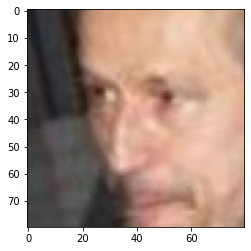

1_000005.jpg
classe 1
Nouvelle Image





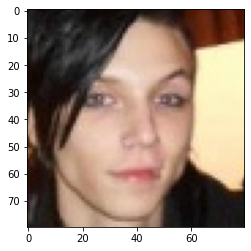

1_000006.jpg
calsse 0
Nouvelle Image





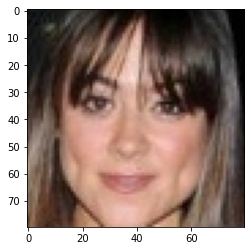

1_000007.jpg
calsse 0
Nouvelle Image





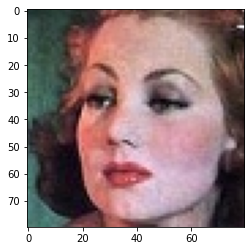

1_000009.jpg
classe 1
Nouvelle Image





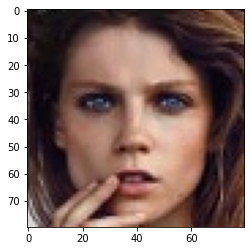

1_000011.jpg
classe 1
Nouvelle Image





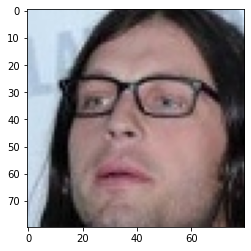

1_000012.jpg
calsse 0
Nouvelle Image





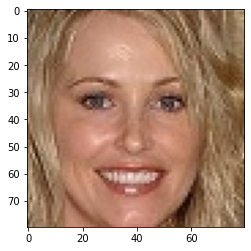

1_000013.jpg
classe 1
Nouvelle Image





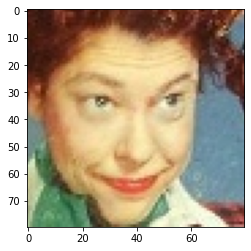

1_000015.jpg
classe 1
Nouvelle Image





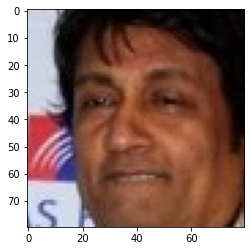

1_000017.jpg
classe 1
Nouvelle Image





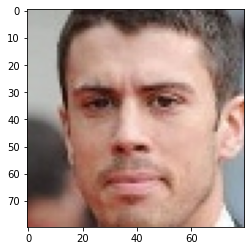

1_000018.jpg
calsse 0
Nouvelle Image





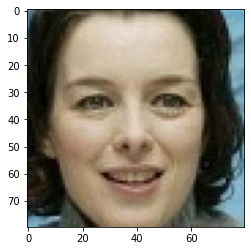

1_000019.jpg
calsse 0
Nouvelle Image





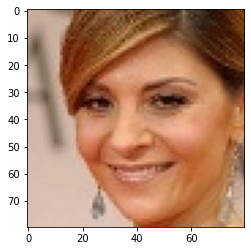

1_000020.jpg
classe 1
Nouvelle Image





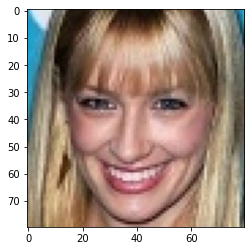

1_000021.jpg
classe 1
Nouvelle Image





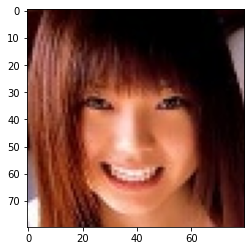

1_000023.jpg
calsse 0
Nouvelle Image





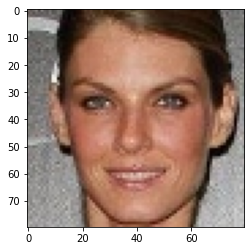

1_000025.jpg
calsse 0
Nouvelle Image





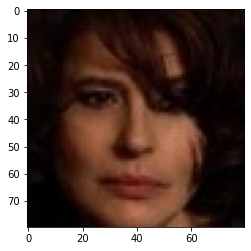

1_000028.jpg
calsse 0
Nouvelle Image





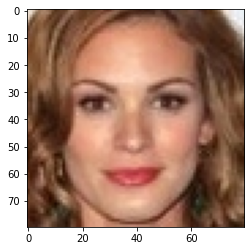

1_000029.jpg
classe 1
Nouvelle Image





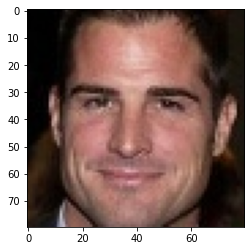

1_000030.jpg
classe 1
Nouvelle Image





In [51]:
dir_path1 = 'data/test/'

for i in os.listdir(dir_path1):
    img = imageTF.load_img(dir_path1 + '//' + i)
    plt.imshow(img)
    plt.show()
    
    X = imageTF.img_to_array(img)
    X = np.expand_dims(X, axis =0)
    images = np.vstack([X])
    
    val = model.predict(images)
    
    print(i)
    if val == 0:
        print("calsse 0")
    else:
        print('classe 1')
        
    print("Nouvelle Image\n\n\n")
    

Objectif : 
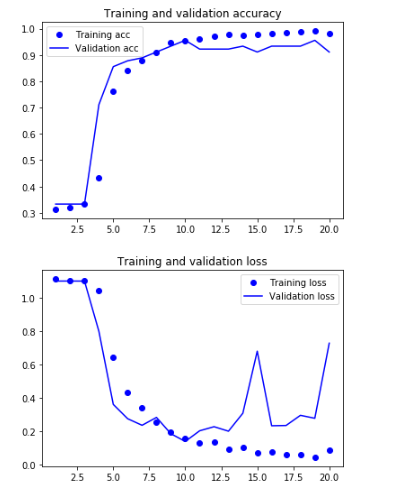
